 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

whale_returns_path = Path("./Resources/whale_returns.csv")
df_whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls 
df_whale_returns_cleaned = df_whale_returns.dropna()

In [5]:
# confirming dropped
df_whale_returns_cleaned.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [73]:
# Reading algorithmic returns

algo_returns_path = Path("./Resources/algo_returns.csv")
df_algo_returns = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True)
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algo_returns_cleaned = df_algo_returns.dropna()

In [9]:
# confirming dropped
df_algo_returns_cleaned.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [74]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")
df_sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col='Date', parse_dates=True)
df_sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Remove non-numeric values (i.e. $)
df_sp_tsx_history['Close'] = df_sp_tsx_history['Close'].str.replace("$","").str.replace(",","")
df_sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Check Data Types

df_sp_tsx_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types

df_sp_tsx_history['Close'] = pd.to_numeric(df_sp_tsx_history['Close'])
df_sp_tsx_history.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns

daily_returns_sp_tsx = df_sp_tsx_history.pct_change()
daily_returns_sp_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
daily_returns_sp_tsx.isnull().sum() # was I supposed to do this for daily returns or just for df sp tsx history?

Close    1
dtype: int64

In [16]:
daily_returns_sp_tsx_cleaned = daily_returns_sp_tsx.dropna()

In [17]:
# confirming nulls dropped

daily_returns_sp_tsx_cleaned.isnull().sum()

Close    0
dtype: int64

In [18]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns_sp_tsx_cleaned.rename(columns={'Close': 'S&P TSX'}, inplace=True)
daily_returns_sp_tsx_cleaned.head() 

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_returns = pd.concat([df_whale_returns_cleaned, df_algo_returns_cleaned, daily_returns_sp_tsx_cleaned], axis='columns', join='inner')
all_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

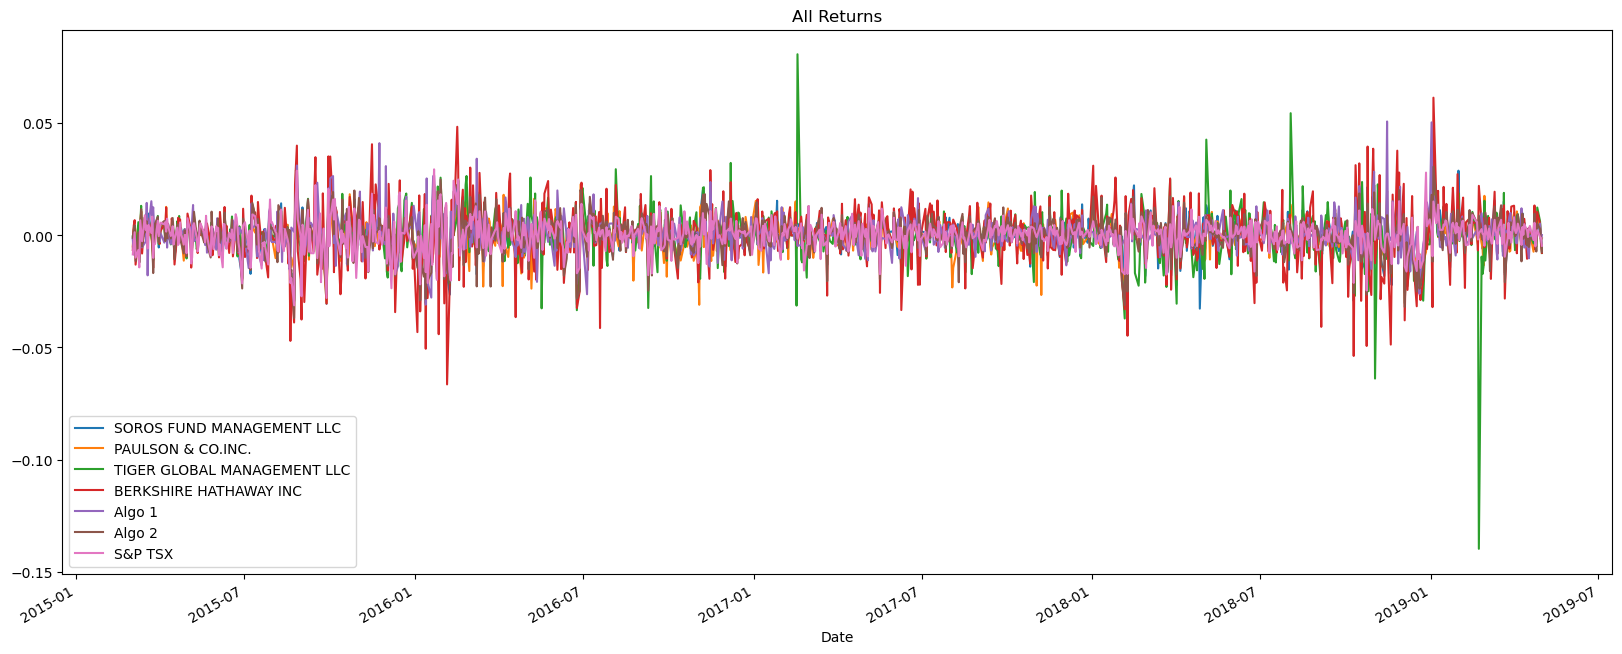

In [78]:
# Plot daily returns of all portfolios

all_returns.plot(figsize=(20,8), title='All Returns');

#### Calculate and Plot cumulative returns.

In [81]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


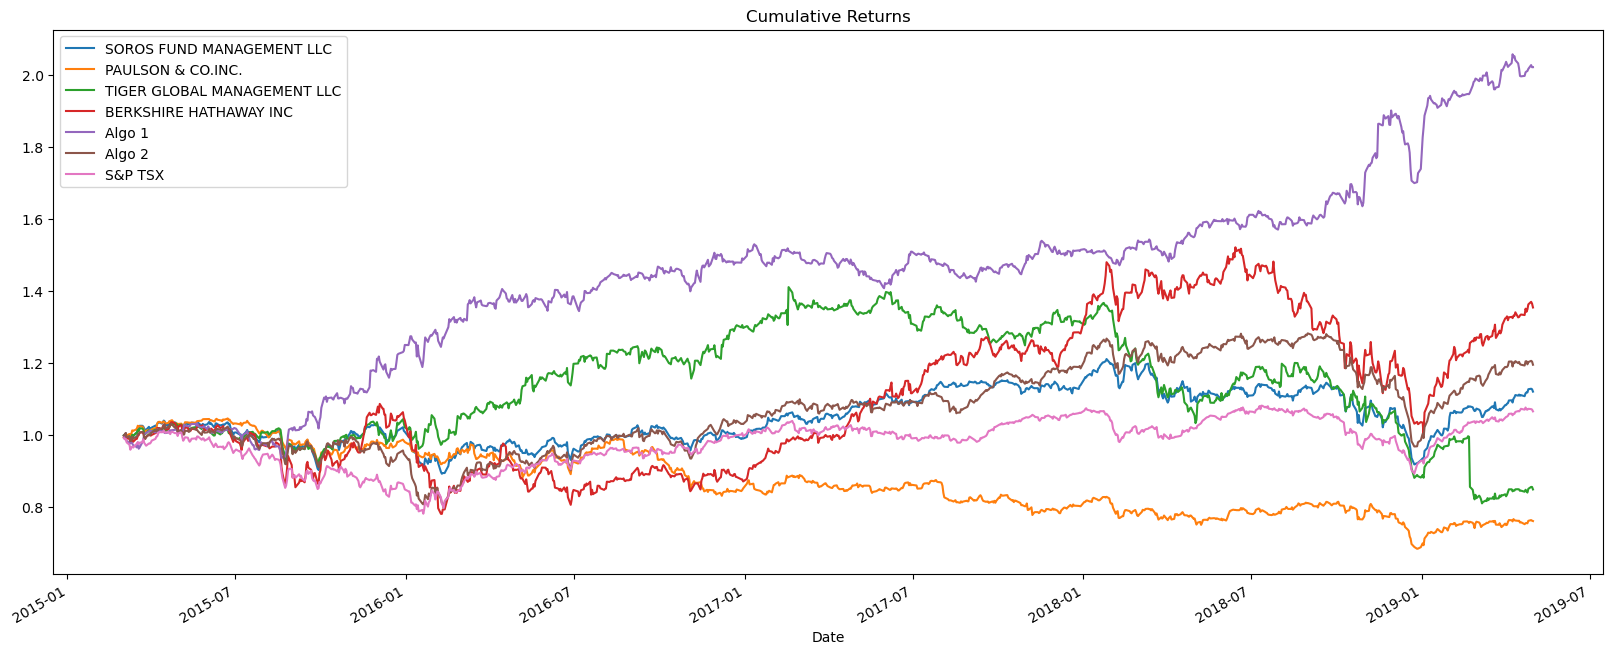

In [87]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(20,8),title='Cumulative Returns');


In [88]:
# Do any portfolios outperform S&P TSX 60? 
# Yes, Algorithmic portfolio and Berkshire Hathaway Inc (?) outperfrom S&P TSX

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


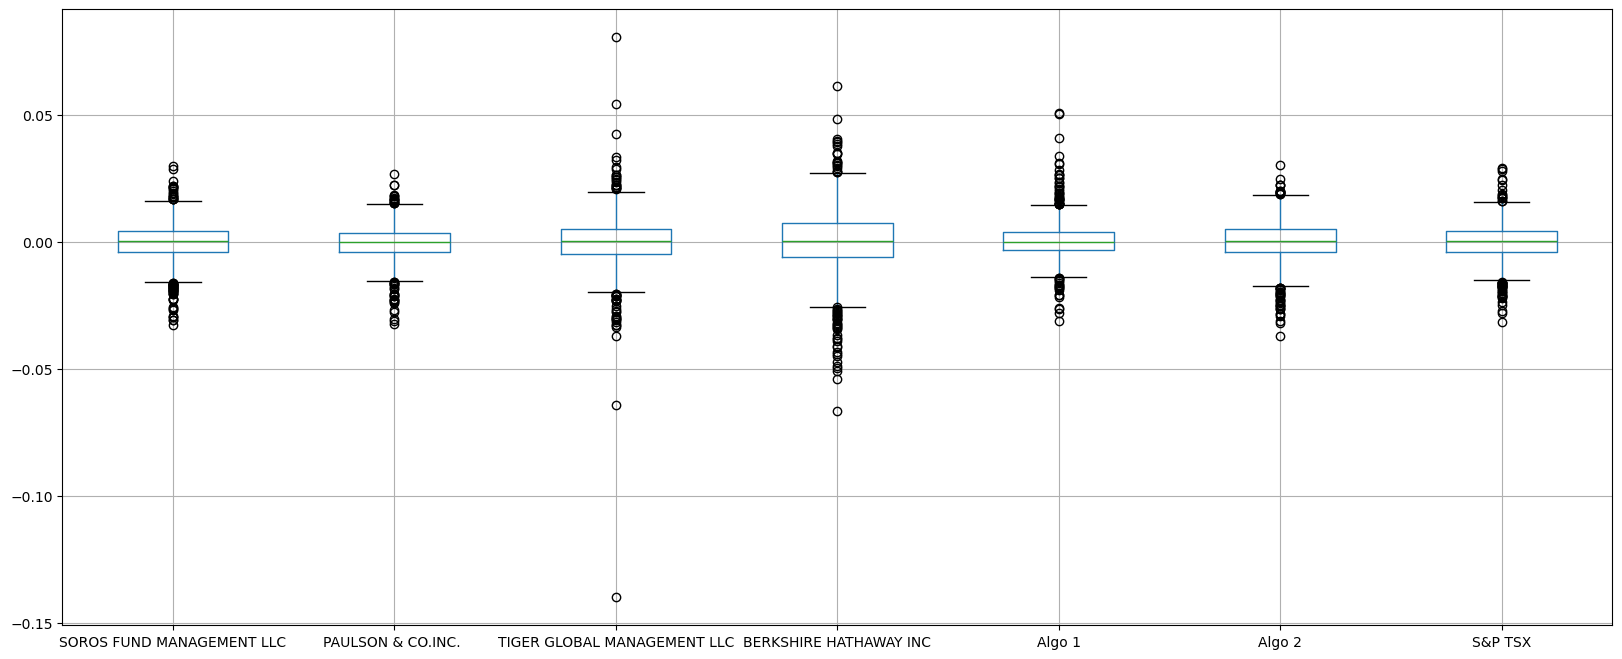

In [91]:
# Box plot to visually show risk

all_returns.boxplot(figsize=(20,8));

### Calculate Standard Deviations

In [98]:
# Calculate the daily standard deviations of all portfolios

std_all_returns = all_returns.std()
std_all_returns

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [102]:
# Calculate the daily standard deviation of S&P TSX 60

sp_tsx_std = all_returns["S&P TSX"].std()
sp_tsx_std

0.007034167748577725

#### Determine which portfolios are riskier than the S&P TSX 60
Both portfolios, Algorithmic and Whales, are more risky than the S&P TSX 60 - given all standard deviations are higher (lower std are less risky)

### Calculate the Annualized Standard Deviation

In [103]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std_all_returns = std_all_returns * np.sqrt(252)
annualized_std_all_returns

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [39]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# therefore we use daily standard deviation calculations for window, correct?

# rolling_std_sp = sp_tsx_daily_std.rolling(window=21)
# rolling_std_sp

daily_returns_sp_tsx_cleaned.rolling(window=21).std()

,S&P TSX
Date,
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-09,NaN
...,...
2019-12-20,0.003366
2019-12-23,0.003298
2019-12-24,0.003216


<Axes: xlabel='Date'>

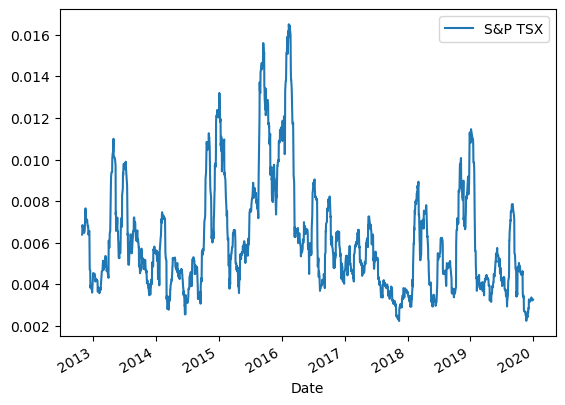

In [40]:

# Plot the rolling standard deviation
daily_returns_sp_tsx_cleaned.rolling(window=21).std().plot()

# is this right? need to use the OG daily returns with the window, std, then plot function
# Cannot use daily std df with rolling window then plot

<Axes: xlabel='Date'>

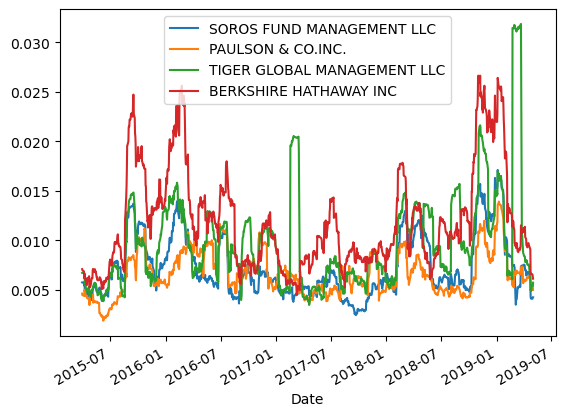

In [41]:
df_whale_returns_cleaned.rolling(window=21).std().plot()


<Axes: xlabel='Date'>

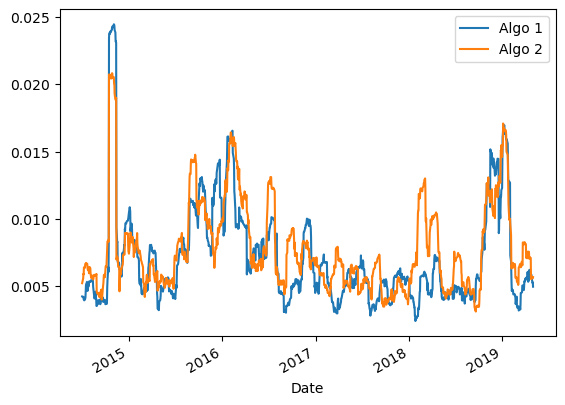

In [42]:
df_algo_returns_cleaned.rolling(window=21).std().plot()

In [43]:

# use this! 
rolling_std_all_portfolios = all_returns.rolling(window=21).std()
rolling_std_all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


In [44]:
rolling_std_all_port_clean = rolling_std_all_portfolios.rolling(window=21).std().dropna()
rolling_std_all_port_clean

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-04-29,0.000597,0.000310,0.000843,0.000572,0.001825,0.000708,0.000964
2015-04-30,0.000569,0.000306,0.000801,0.000528,0.001860,0.000684,0.000921
2015-05-01,0.000527,0.000307,0.000740,0.000484,0.001865,0.000648,0.000869
2015-05-04,0.000472,0.000306,0.000664,0.000437,0.001863,0.000597,0.000792
2015-05-05,0.000411,0.000306,0.000558,0.000451,0.001836,0.000515,0.000677
...,...,...,...,...,...,...,...
2019-04-25,0.001077,0.000415,0.001335,0.001480,0.000291,0.000830,0.000356
2019-04-26,0.001184,0.000318,0.001310,0.001600,0.000242,0.000874,0.000393
2019-04-29,0.001262,0.000290,0.001291,0.001688,0.000251,0.000900,0.000419


In [45]:
rolling_std_all_port_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

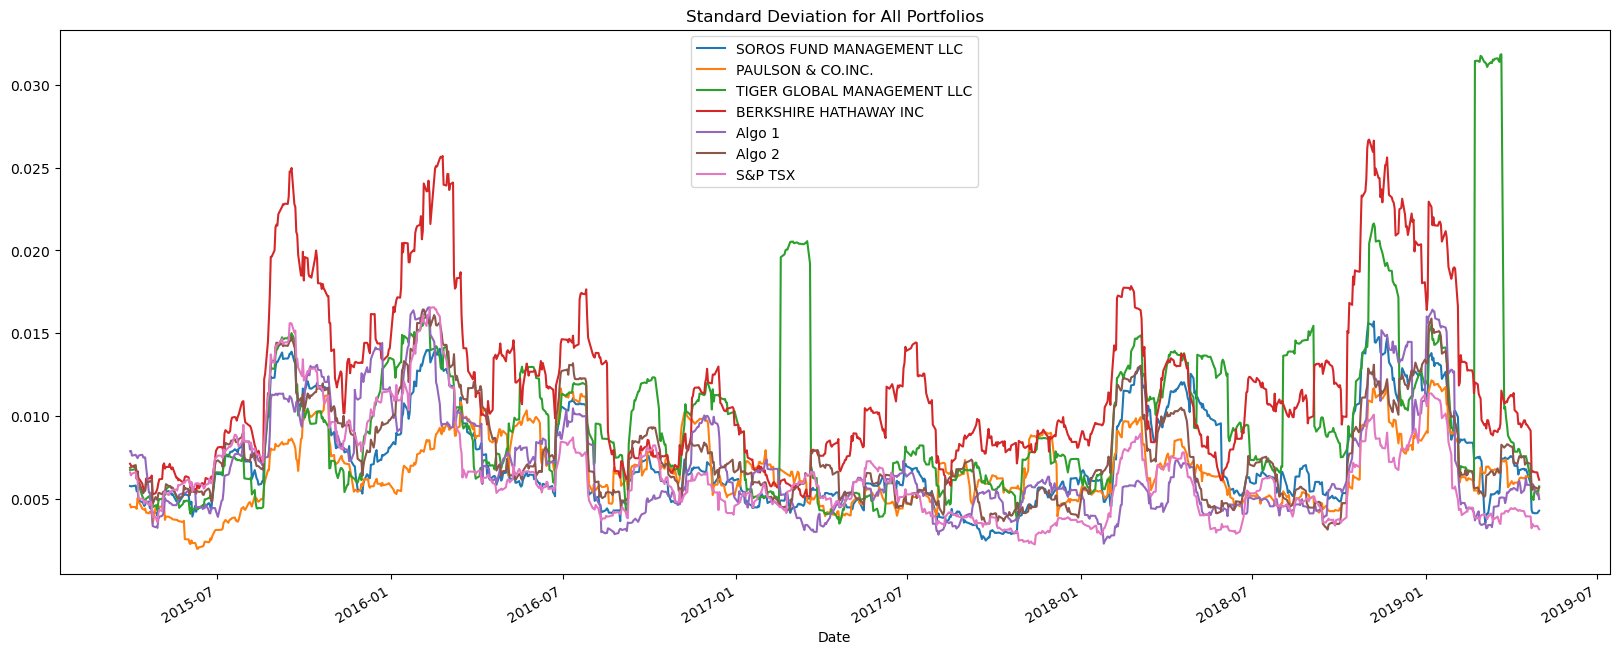

In [46]:
all_returns.rolling(window=21).std().plot(figsize=(20,8),title='Standard Deviation for All Portfolios');

# xlabel="abc",ylabel='abc

### Calculate and plot the correlation

In [47]:
# Calculate the correlation 
# Can I just use the all returns table we previously concated? 

all_returns.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: >

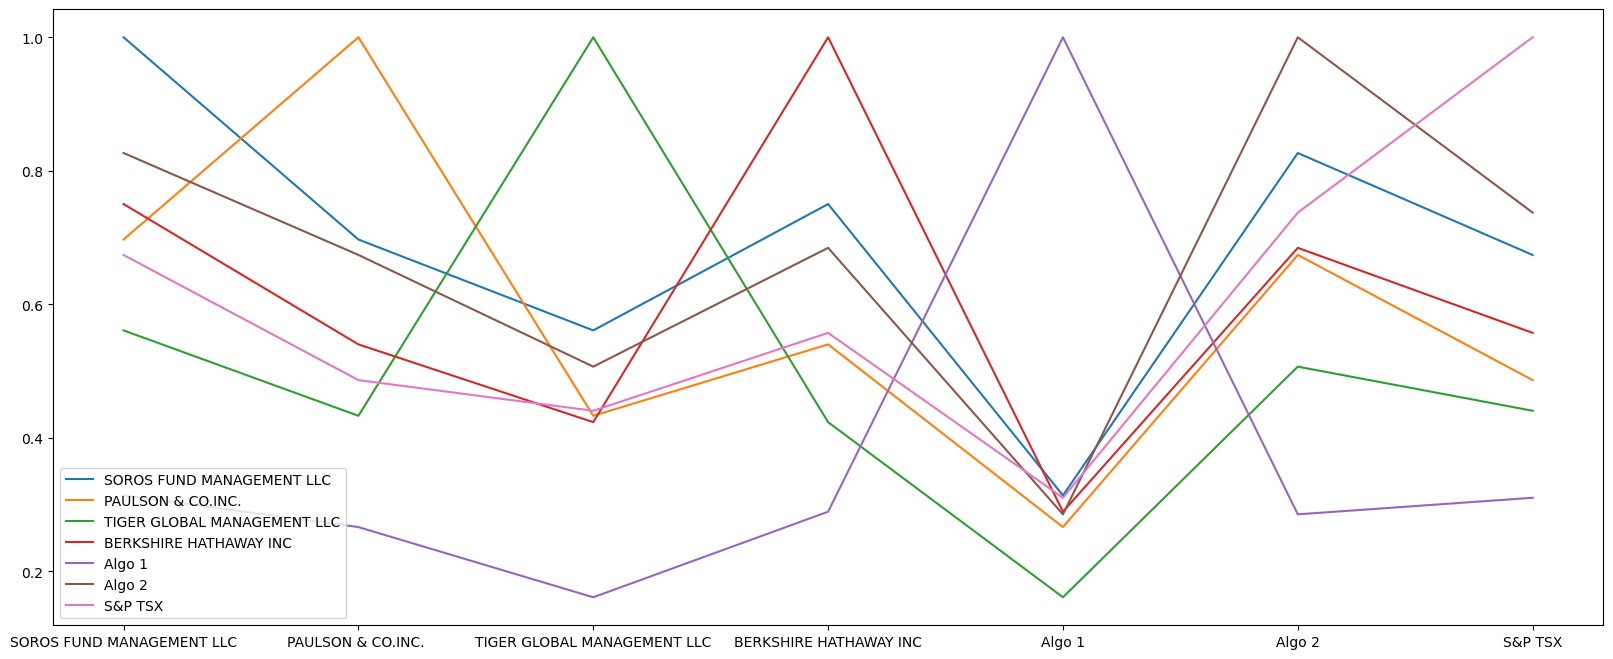

In [48]:

# Display de correlation matrix

all_returns.corr().plot(figsize=(20,8))

# set title and axis

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [49]:
# Calculate covariance of a single portfolio

# whale_covariance = df_whale_returns_cleaned.cov()
# whale_covariance

all_returns_covariance = all_returns['Algo 1'].rolling(window=60).cov(all_returns['S&P TSX'])
all_returns_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64

In [50]:
# Calculate variance of S&P TSX

sp_variance = all_returns['S&P TSX'].rolling(window=60).var()
sp_variance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [51]:
# Computing beta
# beta = cov/var

beta = all_returns_covariance / sp_variance
beta

# sensitivity measure/metric 

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 1029, dtype: float64

<Axes: xlabel='Date'>

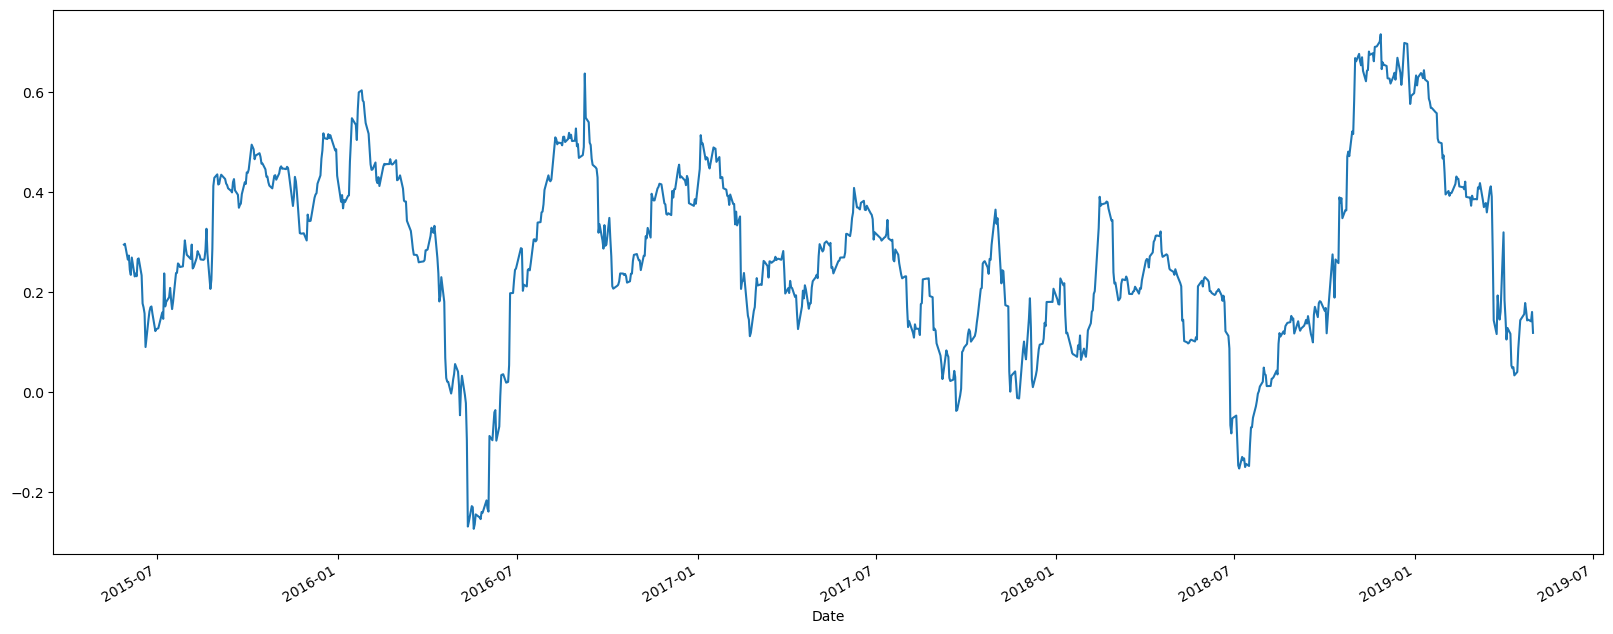

In [52]:
# Plot beta trend

beta.plot(figsize=(20,8))


# ex from class: rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [53]:
# Use `ewm` to calculate the rolling window
# how do we do this? is this correct? Code online says to use halflife = '21 days')
# do this! all_returns

all_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

# the > 0 the better

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

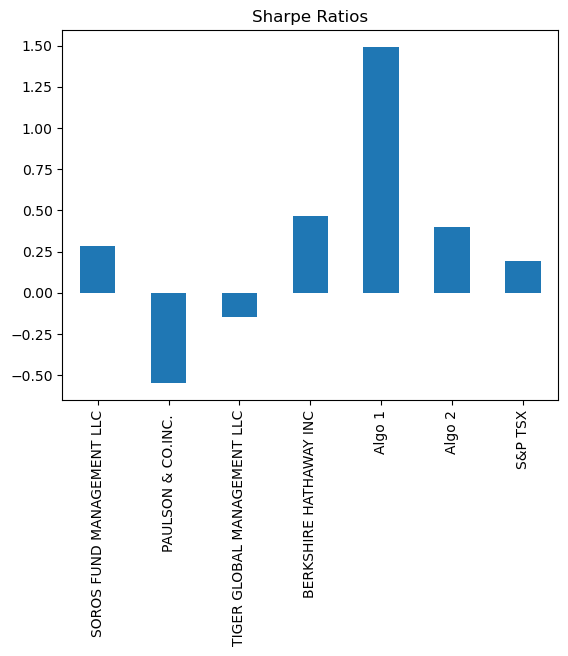

In [55]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
Based on the sharpe ratios and cumulative returns, the algoritmic strategies are outperforming both the market and the whales portfolio. However, given we do not have a risk free rate to use in our sharpe ratio calculation, the sharpe ratio results may be skewed. However, from cumulative returns perspective - alogrithmic strategies performed better.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Reading data from 1st stock


In [57]:
# Reading data from 2nd stock


In [58]:
# Reading data from 3rd stock


In [59]:
# Combine all stocks in a single DataFrame


In [60]:
# Reset Date index


In [61]:
# Reorganize portfolio data by having a column per symbol


In [62]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [63]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# .dot

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Join your returns DataFrame to the original returns DataFrame


In [65]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [66]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [67]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [68]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [69]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios


In [71]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!